## Visualizing Intermediate features

In [2]:
!pip install jupyterthemes

from jupyterthemes import jtplot
# you can select an alternative theme's plot style by name
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style('monokai')
jtplot.figsize(aspect=4)

from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from torchvision import models, transforms
import torch.nn.functional as F
import numpy as np
import torch
import torch.nn as nn

## Load Pretrained model

In [3]:
model = models.resnet18(pretrained=True)
model.cuda()
model.eval()
# model.conv1.register_forward_hook(hook_fn)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Define function that saves intermediate feature maps

In [6]:
outputs_list = []
# Define hook class
class Hook():
    def __init__(self, layer): ## layer에 forward hook을 걸어주는 부분
        self.hook = layer.register_forward_hook(self.hook_fn)
        
    def hook_fn(self, module, inputs, outputs): ## hook function
        ## feature map
        outputs_list.append(outputs.cpu().detach().numpy()) ## outputs list에 feature map을 저장
    def close(): ## 걸어준 hook을 지우는 부분
        self.hook.remove()

# layer1 = nn.Linear(1, 10)
# hook = Hook(layer1) ## initialize nn.linear hook이 걸리게 됨
# a = torch.tensor([1.0])
# output = layer1(a)


In [11]:
hook_handles = []

#hook 걸어주기
print(list(model.modules()))
print(len(list(model.modules())))
for layer in model.modules():
    if type(layer) == nn.Conv2d:
        hook_handles.append(Hook(layer))
##implement this
    
    

[ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

## Load image

In [14]:
from PIL import Image
from torchvision import transforms as T

image = Image.open('Cat.jpg')
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to("cuda")
outputs_list = []
out = model(X) #model forward. forward가 되면서 위에서 걸어준 hook에 의해 feature map들이 저장되게 됩니다. 

In [22]:
outputs_list[1].shape

(1, 64, 56, 56)

In [27]:
# print(hook_handles[0].outputs.shape)
# outputs_list = []

# for hook in hook_handles:
#     outputs_list.append(hook.outputs) #각 hook에 저장된 output들을 outputs_list에 저장해줍니다.
    
# print(len(outputs_list))
# print(outputs_list[0].shape)

20
(1, 64, 112, 112)


## Visualize intermediate feature maps
### Let us change the layer number and see how the feature map changes!

(512, 7, 7)


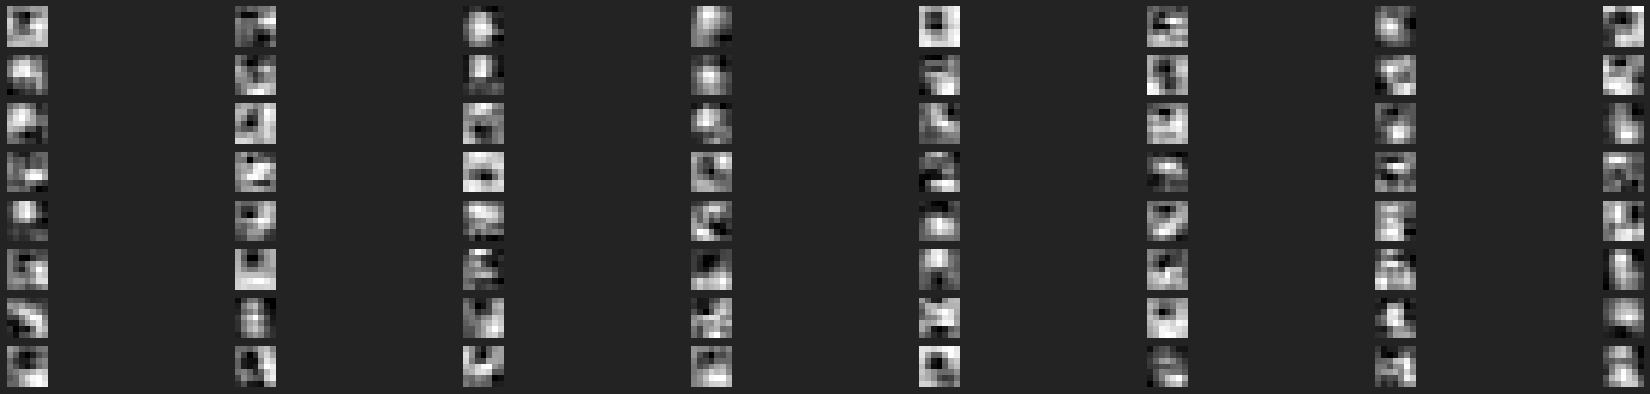

In [25]:
act = outputs_list[19][0] #outputs_list 0: layer number, 1: batch, 2: channel, 3: w, 4: h
print(act.shape)

for i in range(act.shape[0]):
    if i == 64: # 64개 channel에 대해서만 visualize
        break
    plt.subplot(8, 8, i+1)
    plt.imshow(act[i, :, :], cmap='gray')
    plt.axis('off')
    plt.savefig('./features.png')

## Visualize CNN filters

In [26]:
# counter to keep count of the conv layers
counter = 0 

# append all the conv layers and their respective weights to the list
model_layer = list(model.modules())

model_weights = [] # we will save the conv layer weights in this list

print(len(model_layer))

for i in range(len(model_layer)):
    if type(model_layer[i]) == nn.Conv2d: # 각 layer가 conv2d일 경우
        counter += 1
        model_weights.append(model_layer[i].weight)
     
print(f"Total convolutional layers: {counter}")

68
Total convolutional layers: 20


torch.Size([512, 512, 3, 3])


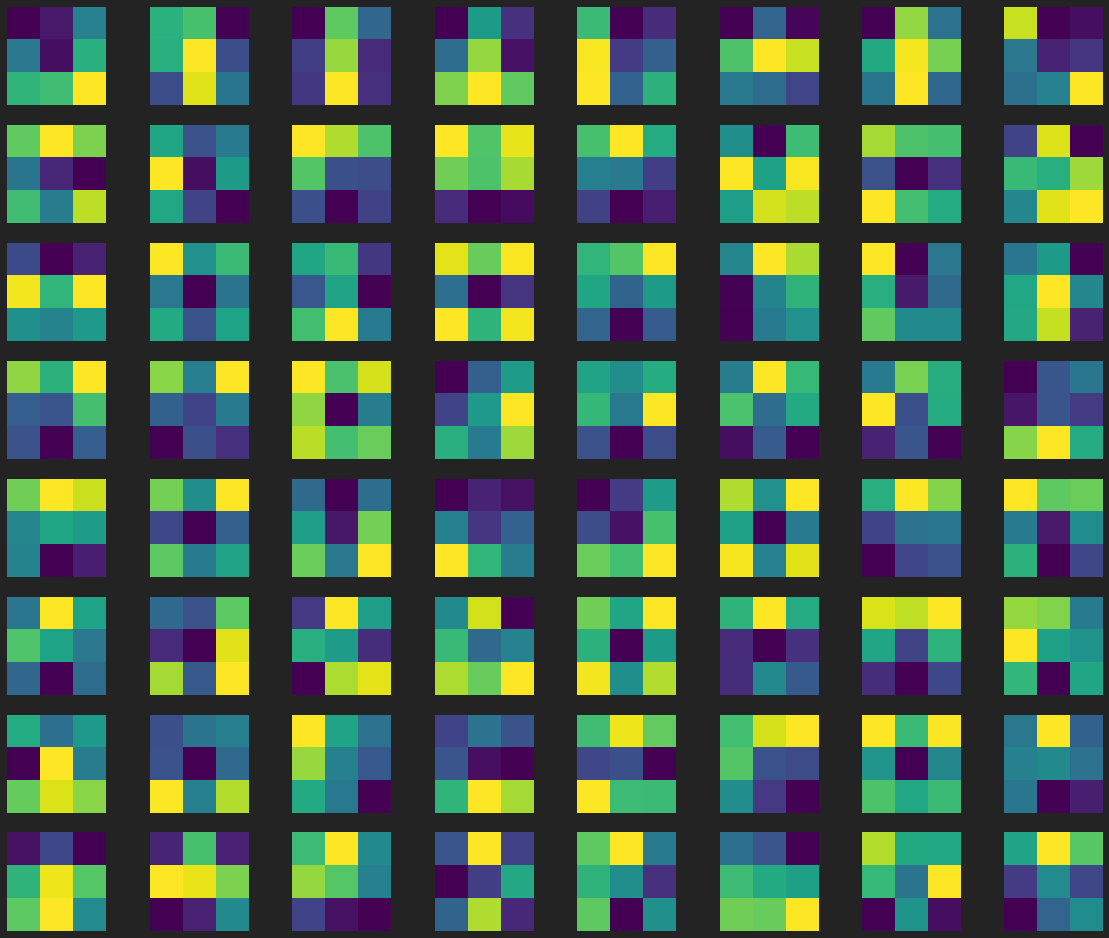

In [30]:
# visualize the first conv layer filters
plt.figure(figsize=(20, 17))

print(model_weights[19].shape)

for i, filter in enumerate(model_weights[18].cpu()): # 첫번째 conv layer의 weight visualize
    if i == 64:
        break
#     print(filter.shape) # filter has shape [3, 7, 7] 
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach())
    plt.axis('off')
    plt.savefig('./filter.png')
plt.show()